[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/ugathoo/DH140_FinalProject.git/HEAD)
# Forest Fire Factors: What Adds Fuel to the Fire?
  Urja Gathoo | August 2, 2024

## Introduction
It is no secret that California is a hotbed for forest fires. The so-called fire season ranges from early summer to as late as the start of winter, causing catastrophic destruction to neighborhoods and livelihoods alike. This analysis seeks to determine what factors contribute to forest fires in order to better protect from and potentially predict them. This is a topic that hits particularly close to home. In 2020, the SCU-Lightning Complex Fires had my family on standby to evacuate. All that separated my home from the evacuation line was a couple of miles, nothing when it comes to how quickly embers can jump and ignite over long distances. Understanding factors that can lead to forest fires is the first step to taking preventatuive measures when those factors are present, or even using modern technology such as satellites to predict conditions that make fires more likely. Prior work on this subject and this particular dataset include a study done by Cortez and Morais in 2007 for the Portuguese Conference on Artificial Intelligence. Specifically, their work takes a look at data mining techniques like Random Forests and Gaussian support vector machines (SVMs) to run predictive analysis on the burned area of forest fires. Their study found that SVMs better predict small fires than Random Forest, using two different regression measures in their comparison (Mean absolute deviation and root mean squared error). This study focuses more on the factors themselves rather than trying to predict fire behavior. 

## Methods

### Dataset
This dataset, provided by the University of California at Irvine's machine learning repository, contains information about 517 forest fires from the Montesinho natural park in the Tr´as-os-Montes northeast region of Portugal, collected using meteorological and other data. Located within a supra-Mediterranean climate, the average annual temperature is within the range 8 to 12◦C. The data used in the experiments was collected from January 2000 to December 2003 and it was built using two sources. The first database was collected by the inspector that was responsible for the Montesinho fire occurrences. The second database was collected by the Braganc¸a Polytechnic Institute, containing weather observations recorded with a 30 minute period by a meteorological station located in the center of the park. Manual labor was used to consolidate the 2 databases into the 517 rows of this dataset(Cortez, Morais 2007). For each fire, 12 features are noted: 
1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: 'jan' to 'dec' 
4. day - day of the week: 'mon' to 'sun'
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3 
7. DC - DC index from the FWI system: 7.9 to 860.6 
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40 
12. rain - outside rain in mm/m2 : 0.0 to 6.4 
13. area - the burned area of the forest (in ha): 0.00 to 1090.84 

For the purposes of this project, we will be focusing on features 3, 9, 10, and 11, and comparing each to feature 13 to get an understanding of the degree of severity of the fire for a given feature. 

This dataset is not without its problems. Namely, there is a lack of transparency from how this data was collected. It is unknown whether or not there were any privacy breaches during collection or if the data itself was gathered in a way that systematically ignore certain regions while prioritizing others. We don't know how the manual labor may have biased the data in favor of certain variables(for instance skewing in favor of one month over another based on the collector's preconceived notions). For this reason, any conclusions drawn through this analysis will be constrained to high-level, general ones rather than more specific statements. 

Although the dataset itself is specific to the northeast region of Portgual and this analysis aims to provide answers for California, conclusions can still be drawn due to specific similarities. Portugual and California both have a cool Mediterranean climate and similar weather patterns (KipperTree 2022). They also lie along similar latitudes (Becky 2016). These commonalities make it possible to make inferences on forest fire severity and likelihood, even though they are two completely separate places. 

### General Approach to Analysis
Using Python, especially libraries such as Pandas and MatPlotLib, the dataset is appropriately modified to examine, analyze, and plot (as necessary) each of the 4 chosen variables and their relation to the overall area burned (a proxy to the severity of the fire). A lack of variance in the area burned at different values of each variable would indicate a lack of impact on the likelihood of a forest fire due to that variable, and vice versa. Understanding the data visualizations is key to forming conclusions in this analysis. 

#### Import the Dataset 

In [15]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import matplotlib.pyplot as plt
  
# fetch dataset 
forest_fires = fetch_ucirepo(id=162) 
  
# data (as pandas dataframes) 
fullset = (forest_fires.data.features).join(forest_fires.data.targets)
print(fullset)

     X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
0    7  5   mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00
1    7  4   oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00
2    7  4   oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00
3    8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00
4    8  6   mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00
..  .. ..   ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...
512  4  3   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44
513  2  4   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29
514  7  4   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16
515  1  4   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00
516  6  3   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00

[517 rows x 13 columns]


{'jan': 2, 'feb': 20, 'mar': 54, 'apr': 9, 'may': 2, 'jun': 17, 'aug': 184, 'sep': 172, 'oct': 15, 'nov': 1, 'dec': 9}


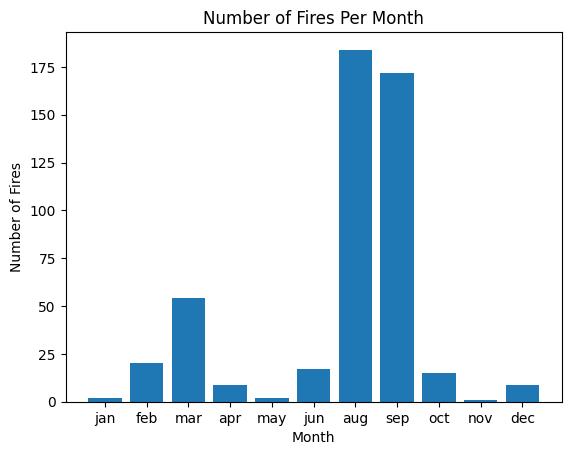

{'jan': 0.0, 'feb': 6.275, 'mar': 4.356666666666667, 'apr': 8.891111111111112, 'may': 19.24, 'jun': 5.841176470588234, 'aug': 12.489076086956521, 'sep': 17.942616279069753, 'oct': 6.638, 'nov': 0.0, 'dec': 13.33}


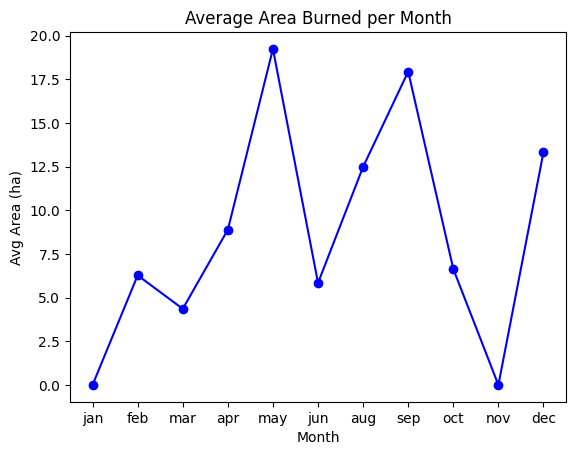

In [29]:
#Variable 1: Month of the year
monthset = fullset[["month","area"]]

#Create a bar graph to see how many fires per month
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'aug', 'sep', 'oct', 'nov', 'dec']
month_tot = {}
for month in months:
  m = len(monthset.loc[monthset['month'] == month])
  month_tot[month] = m

print(month_tot)
plt.bar(month_tot.keys(), month_tot.values())
plt.title("Number of Fires Per Month")
plt.xlabel("Month")
plt.ylabel("Number of Fires")
plt.show()

#Create line plot to see on average the severity of fires per month
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'aug', 'sep', 'oct', 'nov', 'dec']
month_avg = {}
for month in months:
  m = monthset.loc[monthset['month'] == month]
  total = sum(m["area"])
  avg = total/len(m["area"])
  month_avg[month] = avg
  
print(month_avg)

plt.plot(month_avg.keys(), month_avg.values(), '-bo')
plt.title("Average Area Burned per Month")
plt.xlabel("Month")
plt.ylabel("Avg Area (ha)")
plt.show()

### Analysis of Months Variable
As one may expect, late summer/early months August and September had the highest number of forest fires by far, at 184 and 172 fires respectively. This correlates to the peak of "fire season" in California, where the summer sun dries out brush and shrubbery to make the perfect kindling for a fire. One notable outlier is March, with a whopping 54 fires. With a relatively temperate climate, it is unclear if this anomaly was caused by a particularly warm period between 2000-2003, or for some other reason. Other possibilites include intentionally set fires and fires lasting several months. We don't know if these fires are double counted; right now it is assumed all fires are unique. Traditionally warmer months, like late spring months of April and May as well as late summer/early fall months of August and September had the most severe fires, driven likely by a combination of a lack of moisture in the air and ground and high temperatures of those seasons. 

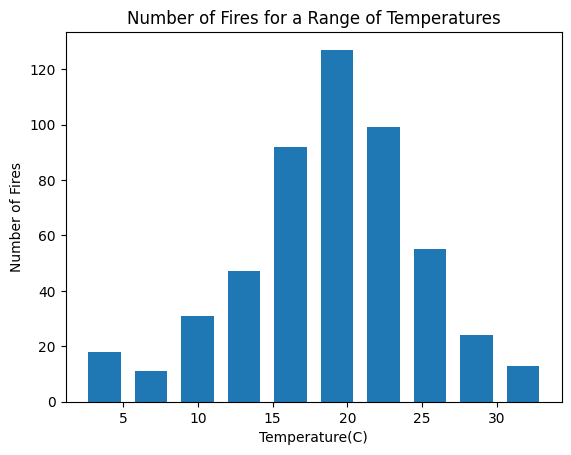

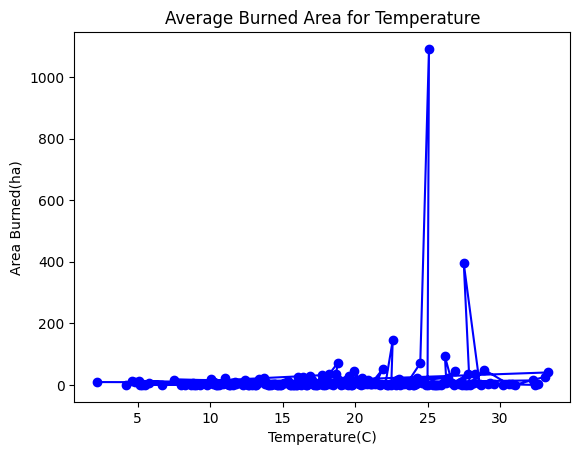

In [38]:
#Variable 2: Temperature
#Create histogram to show ranges of temps with highest number of fires
tempset = fullset[['temp', 'area']]

plt.hist(tempset['temp'], rwidth=0.7)
plt.title("Number of Fires for a Range of Temperatures")
plt.xlabel("Temperature(C)")
plt.ylabel("Number of Fires")
plt.show()
tempdict = {}
for t in set(tempset['temp']):
  te = tempset.loc[tempset['temp'] == t]
  avg = sum(te['area'])/len(te['area'])
  tempdict[t] = avg
  
plt.plot(tempdict.keys(), tempdict.values(), '-bo')
plt.title("Average Burned Area for Temperature")
plt.xlabel("Temperature(C)")
plt.ylabel("Area Burned(ha)")
plt.show()

### Analysis of Temperature Variable
As expected, higher temperatures yielded more fires, but the shape of the graph above is interesting. One would expect a steady upward trend in the number of fires as the temperature grows. Instead, we see a skewed bell curve, with the majority of fires occuring when the temperature is between 15 - 25 degrees Celsius. From the data collectors, we know that this range falls 3-13 degrees higher than the normal high temperature of the region. To some degree however, the dropoff at temperature extreme highs makes sense. When the temperature is that high, people tend to be more careful, taking less risks and being hypervigilant for fire hazards. 15 degrees Celsius is about 59 degrees Farenheit, significantly cooler than 30 degrees Celsius(86 deg F). It stands to reason that as temperature dips slightly, people tend to let their guards down, leading to more risky and fire prone behavior. The observed temperature may also be impacted by cooling factors like wind. As oxygen adds fuel to a fire, a windier cool day poses significantly more fire risk than a warmer, less windy day. Temperature appears to have no bearing on how severe a fire is, as the trend for the bottom graph is a straight flat line. 

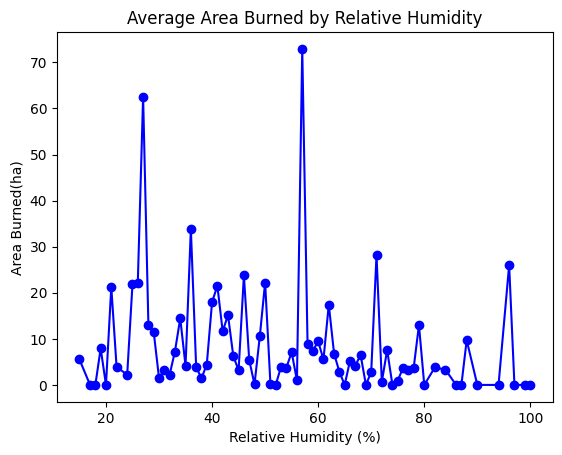

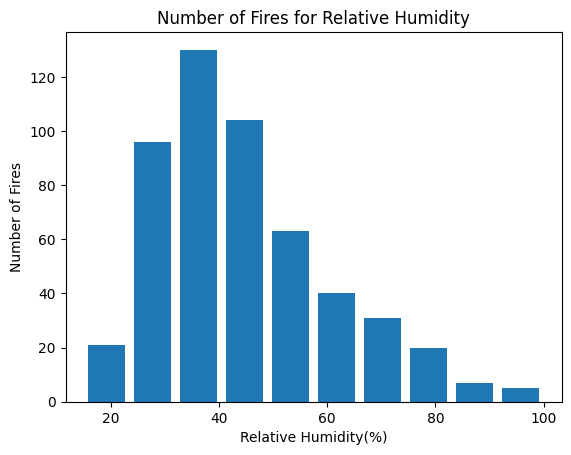

In [41]:
#Variable 3: Relative Humidity
#Create Average area burned line plot
humset = fullset[['RH', 'area']]
humdict = {}
for hum in set(humset['RH']):
  h = humset.loc[humset['RH'] == hum]
  avg = sum(h['area'])/len(h['area'])
  humdict[hum] = avg
  
plt.plot(humdict.keys(), humdict.values(), '-bo')
plt.title("Average Area Burned by Relative Humidity")
plt.xlabel("Relative Humidity (%)")
plt.ylabel("Area Burned(ha)")
plt.show()

plt.hist(humset["RH"], rwidth=0.8)
plt.title("Number of Fires for Relative Humidity")
plt.xlabel("Relative Humidity(%)")
plt.ylabel("Number of Fires")
plt.show()

### Analysis of Relative Humidity Variable
Initially, I thought that with more moisture in the air, fires would be less severe as they would not be able to burn as intensely. However, the graph above dispels that notion. At practically every level of humidity, the impact on the severity of the fire seems to be very little, a rough oscillation around a straight flat line trend. However, the histogram reveals that skew we were anticipating. While humidity may not have a great impact on the severity of a fire, lower humidity means a greater fire risk than higher humidity. 

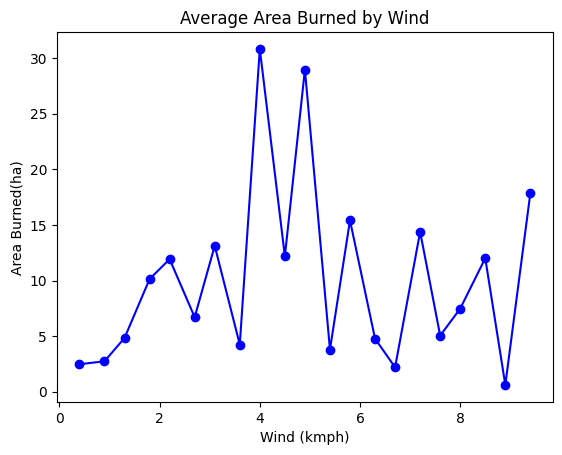

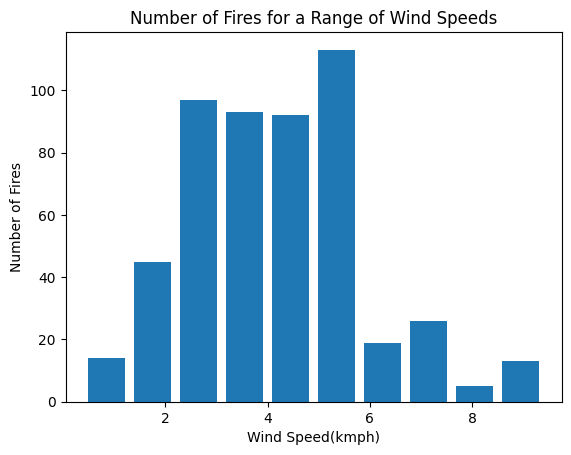

In [44]:
#Variable 4: Wind
#Histogram of wind

#Average Burned Line Plot
windset = fullset[['wind', 'area']]
winddict = {}
for w in sorted(set(windset['wind'])):
  wi = windset.loc[windset['wind'] == w]
  avg = sum(wi['area'])/len(wi['area'])
  winddict[w] = avg
  
plt.plot(winddict.keys(), winddict.values(), '-bo')
plt.title("Average Area Burned by Wind")
plt.xlabel("Wind (kmph)")
plt.ylabel("Area Burned(ha)")
plt.show()

plt.hist(windset["wind"], rwidth=0.8)
plt.title("Number of Fires for a Range of Wind Speeds")
plt.xlabel("Wind Speed(kmph)")
plt.ylabel("Number of Fires")
plt.show()

### Analysis of Wind Variable
There appears to be a Golidlocks spot of sorts where wind speeds create severe fires frequently. Both graphs have about the same shape, peaking at a range between 2 and 6 kilometers per hour. More or less than that and fires don't occur as often or as intensely. This makes some sense. Blowing too hard on a candle will extinguish it; it follows that for any fire, too much wind will kill it. Because fires need air to grow, too little wind also will not feed a fire enough before it dies. The sweet spot the data reveals gives the fire enough air to spread while not blowing hard enough to put it out completely. 

## Discussion
When looking at factors contributing to the overall severity and frequency of fires, many common assumptions were proven while surprising insights were revealed. When it comes to the time of year, our analysis of the months variable showed that as expected warmer months in late summer and early fall are at higher risk of intense fires. At temperatures between 15-25 deg Celsius,humidity between 20 and 50%, or wind speeds between 2 and 6 kmph, the risk of fire (severe or not) is increased. Whenever at least one of the above 4 factors is detected in the fire-prone range found, extra preventative precautions should be taken. Be it controlled burns of dense brush areas or creating empty land boundaries where the fire has nothing to burn, recognizing these factors is key to controlling or even preventing forest fires. Forest fires have caused billions of dollars of damages over the years, and have taken lives and livelihoods in the process. The reality is that forest fires will happen, but understanding how different environmental elements play into their occurence is important for adequate preparation and even prediction. 

## References
Cortez,Paulo and Morais,Anbal. (2008). Forest Fires. UCI Machine Learning Repository. [https://doi.org/10.24432/C5D88D](https://doi.org/10.24432/C5D88D).

BeckyB. (2016). On the same latitude as San Francisco. BeckyInPortugal.com [https://beckyinportugal.com/2016/11/20/climate-latitude-weather-portugal/](https://beckyinportugal.com/2016/11/20/climate-latitude-weather-portugal/)

KipperTree. (2022). Is Portugal The California Of Europe. [https://kippertree.com/blogs/is-portugal-the-california-of-europe](https://kippertree.com/blogs/is-portugal-the-california-of-europe#:~:text=While%20Portugal%20is%20in%20Europe,also%20winter%20is%20less%20harsh).